# <h1> **ANÁLISIS DE LA EMPRESA ZUBER** </h1> 


### <h2> **DESCRIPCIÓN DEL PROYECTO** </h2>

**Zuber**, una nueva empresa de viajes compartidos que se está lanzando en Chicago. se busca encontrar patrones en la información disponible para comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.



Al trabajar con una base de datos, se analizan los datos de los competidores y se busca probar una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

### <h2> **DESCRIPCIÓN DE LOS DATOS** </h2>


**Una base de datos con información sobre viajes en taxi en Chicago:**

`Tabla neighborhoods`: datos sobre los barrios de la ciudad
* name: nombre del barrio
*neighborhood_id: código del barrio
* tabla cabs: datos sobre los taxis
* cab_id: código del vehículo
* vehicle_id: ID técnico del vehículo
* company_name: la empresa propietaria del vehículo.

`Tabla trips`: datos sobre los viajes
* trip_id: código del viaje
* cab_id: código del vehículo que opera el viaje
* start_ts: fecha y hora del inicio del viaje (tiempo redondeado a la hora)
* end_ts: fecha y hora de finalización del viaje (tiempo redondeado a la hora)
* duration_seconds: duración del viaje en segundos
* distance_miles: distancia del viaje en millas
* pickup_location_id: código del barrio de recogida
* dropoff_location_id: código del barrio de finalización

`tabla weather_records`: datos sobre el clima
* record_id: código del registro meteorológico
* ts: fecha y hora del registro (tiempo redondeado a la hora)
* temperature: temperatura cuando se tomó el registro
* description: breve descripción de las condiciones meteorológicas, por ejemplo, "lluvia ligera" o "nubes dispersas"


Luego con estas tablas, se prode a utilizar el lenguaje SQL para obtener la información relavante e importarla como archivos SQL a python para analizar los datos y dar respuesta  la hipótesis:

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

### <h2> **ANÁLISIS EXPLORATORIO DE LOS DATOS** </h2>

#### <h3> **LIBRERÍAS** </h3>

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import scipy as sc
from scipy import stats as st

#### <h3> **PREPROCESAMIENTO DE DATOS** </h3>



Se muestran los datasets


In [ ]:
try:
  company = pd.read_csv('/content/drive/MyDrive/practicum/Sprint6/project_sql_result_01.csv')
except:
  company = pd.read_csv('/project_sql_result_01.csv')
company.head(10)

In [ ]:
try:
  dropoff = pd.read_csv('/content/drive/MyDrive/practicum/Sprint6/project_sql_result_04.csv')
except:
  dropoff = pd.read_csv('/project_sql_result_04.csv')

dropoff.head(10)

In [ ]:
try:
  trips = pd.read_csv('/content/drive/MyDrive/practicum/Sprint6/project_sql_result_07.csv')
except:
  trips  = pd.read_csv('/project_sql_result_04.csv')

trips.head(10)

Se procede a observar el tipo de datos, se sabe que no habrá ausentes ya que se extrajeron los datos de la base de datos SQL por medio de un `INNER JOIN`:

In [ ]:
company.info()

Se observa que los tipo de dato son adecuados y no se debe realizar ninguna modificación, a continuación comprobamos el data frame `dropoff`

In [ ]:
dropoff.info()

Como se observa no se debe ralizar ninguna modificación a los datos 

Por ultimo se analiza la tabla de `trips`

In [ ]:
trips.info()

Se prode a cmabiar el tipo de datos de la columna `'start_ts'` a tipo `datetime`

In [ ]:
trips['start_ts'] = pd.to_datetime(trips['start_ts'])

Se verifica el cambio

In [ ]:
trips.info()

Se observa que el procedimiento fuie exitoso

#### <h3> **ANÁLISIS DE LOS DATOS** </h3>

Primeramente, se procede a determinar cuales son los 10 barrios con mejor average de finalización de viajes

In [ ]:
dropoff.sort_values(by = 'average_trips', ascending = False).head(10)

A continuación estudiamos como se distribuyen los datos en los barrios

In [ ]:
dropoff.describe()

Como se puede observar, vemos que de media se terminaron 600 en los barrios estudiados en noviembre de 2017. Sin embargo su mediana está en torno a los 50 viajes terminados, del mismo modo se evidencia la desviación standar es incluso más alta que la media, mosrando que los datos estan bastantes dispersos del centro de la distribución, con lo que se puede inferir que ciertos barrios deben de utilizar mucho más el servicio que otros, por gran diferencia 

Se procede a graficar los valores para visualizar las características encontradas. Se crea una pivot Table

In [ ]:
dropoff_pivot = dropoff.pivot_table(index='dropoff_location_name').sort_values(by='average_trips', ascending = False).head(10)

Se realiza un gráfico de barras

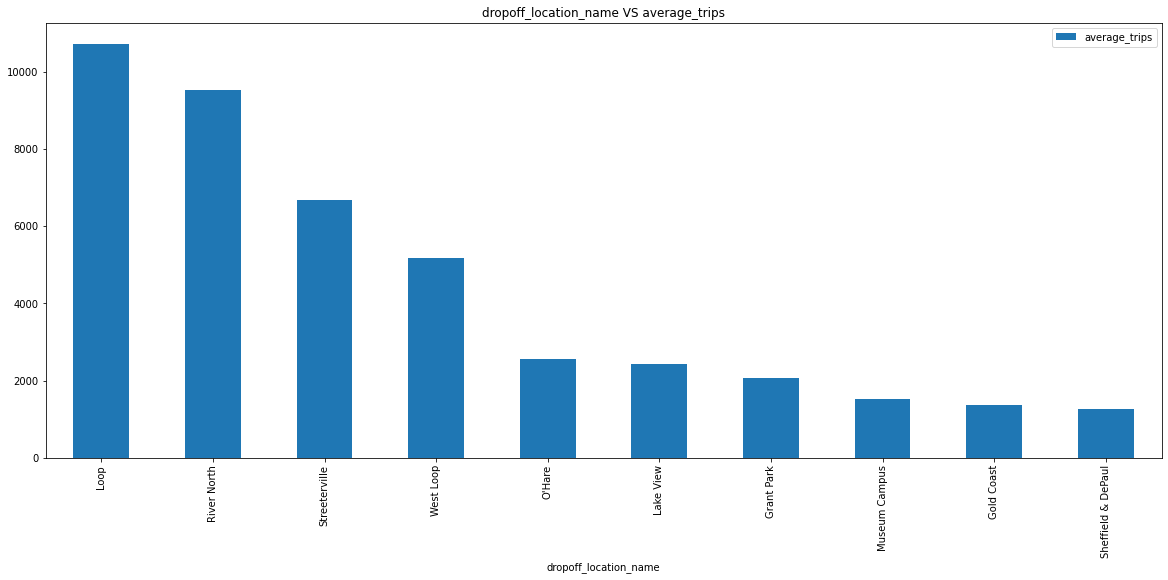

In [ ]:
dropoff_pivot.plot(kind = 'bar', figsize = (20,8))
plt.title('dropoff_location_name VS average_trips')
plt.show()

`Loop` con diferencia es el barrio cantidad de viajes culminados, con gran diferencia, enttres los 10 barrios más populares, se evidencia que valor es practicamente 20 veces la media de los valores, y que los 10 están al menos 2 veces por encima de la mediana. Siendo el menos popular de ellos `Sheffield & DePaul` con 1260 viajes terminados.

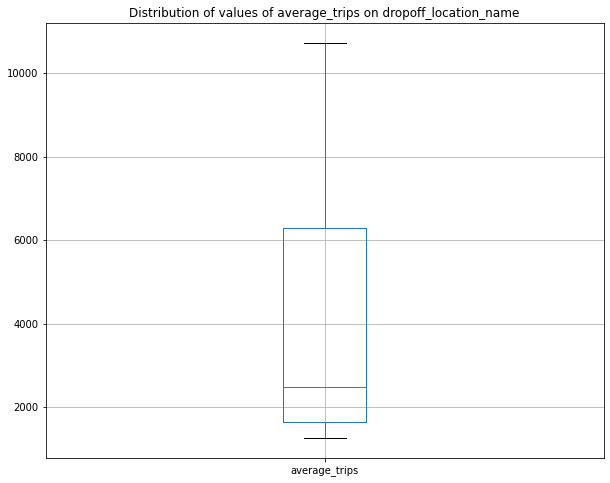

In [ ]:
dropoff_pivot.boxplot(figsize = (10,8))
plt.title('Distribution of values of average_trips on dropoff_location_name')
plt.show()

Como se observa, hay una clara desviación de los datos por encima del 75% de la distribución, donde el 50% está bastante cerca del 25%, sin tender a tener valores atípicos. Mostrando que el sesgo de los datos es hacia el aumento.

Prosiguiendo, se analiza la distribución del número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.

In [ ]:
company.describe()

Como se observa, la mediana oscila en unos 178 viajes, con una media de 2145 viajes se encuentran bastante alejadas, por lo que deben haber valores muy altos y una posible presencia de atípicos, dado el numero tan elevado en al desviación estandar, y que la media incluso se encuentra por encima del 75% de la distribución, por loq eus e puede decir que existen algunas compañias con unas ventas muy superiores a las otras.

Se crea una tabla que nos permita realizar un gráfico de barra y caja y bigotes para determinar que valores son los mas proliferantes.

In [ ]:
company_pivot = company.pivot_table(index='company_name').sort_values(by='trips_amount', ascending = False).head(15)

Se decide truncar a las 15 mejores empresas, para que el gráfico sea mas sencillo de leer y se llegue a conclusiones acertadas.

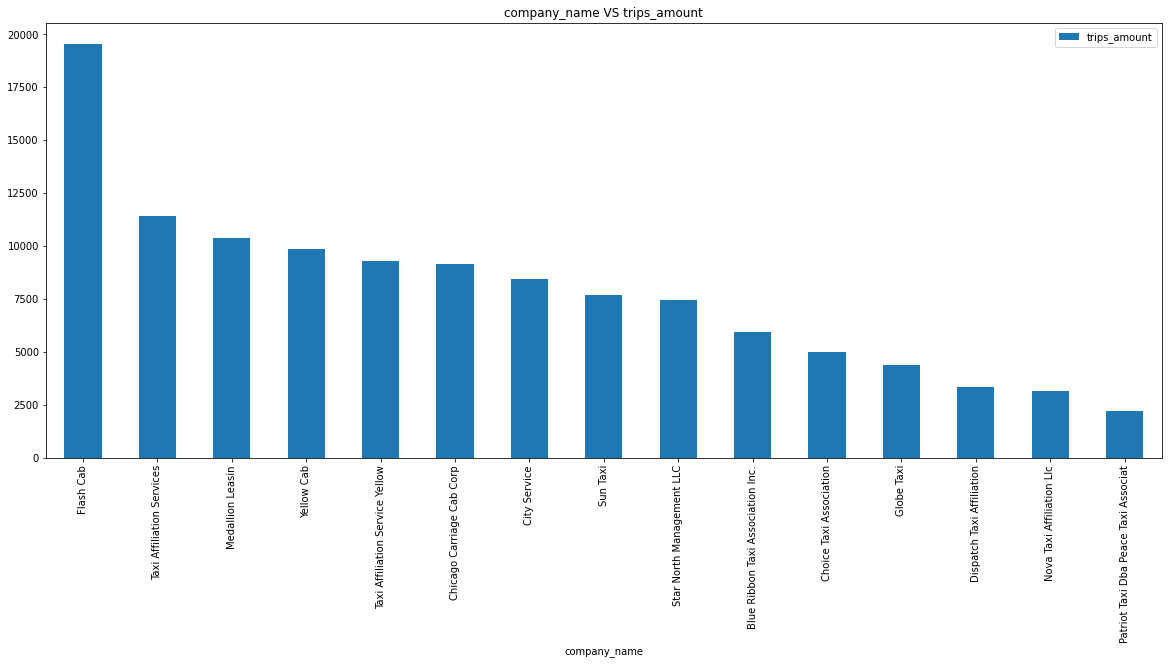

In [ ]:
company_pivot.plot(kind = 'bar', figsize = (20,8))
plt.title('company_name VS trips_amount')
plt.show()

Flash cap, es una compañia con un rendimiento bastante elevado, incluso tiene casi el doble de viajes que el segundo puesto de la lita. POr loq ue ya se sabe que si se quiere ser el mejor se debe superar los 19558 viajes diarios. Sin embargo para estar entre las 10 mejores solamente se deben superar 5953 viajes. 

Por último se estudian los valores atípicos

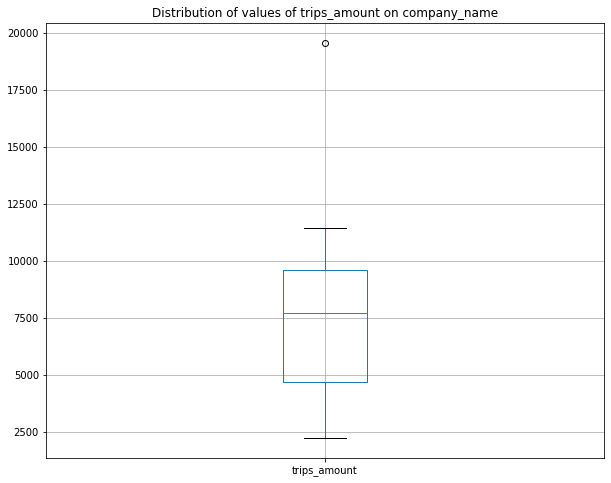

In [ ]:
company_pivot.boxplot(figsize = (10,8))
plt.title('Distribution of values of trips_amount on company_name')
plt.show()

En este caso el único valor atípico fue el de la empresa Flash Cab, de resto todos se encuentran en el rango de datos óptimo. Seguramnete tuvo suerte ese día o alguna condición favorable para el. Sine mabrgo vemos como la distribución esta mejor que la de los barrios, se ve que cuando se estudia una zona específica, vemos una mayor preferencia a ciertos medios de transporte.

##### <h4> **CONCLUSION INTERMEDIA** </h4>


Se evidencia una mayor tendencia a emplear viajes en taxi en los barrios de `Loop`, `River North`, `Streeterville`, `West Loop`	y  `O'Hare`	por los que son los sitios donde sería ideal comenzar a posicionar la compañia, aunque probablmente esto evidencia una mayo competencia, por lo que la campaña de marketing debe estar a al altura del desafío.

#### <h3> **COMPROBACIÓN DE HIPÓTESIS** </h3>

A lo largo del problema, la empresa nos indica que quiere demostrar que "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare son iguales los sábados lluviosos". Por lo que se utilizará el dataframe trips, el cual contiene esta data y fué previmente tratada desde la base de datos, sinedo esta la hipótesist nula. 

Se crea una función que ayuda a determinar basado en un `ttest_rel` o un `ttest_ind` si se debe rechacar la hipótesis nula o no, en este caso en concreto, utilizamos `ttest_rel`, por lo que la variable `rel` quedará por defecto ya que los datos no cumplen siempre con las mismas condicones, aunque sea la misma compañía puede que no sea el mismo auto, conductor, entre otros. 

In [ ]:
def hipotesis_nula_muestras(L1, L2, rel = True):
  '''
  Esta función permite saber si debemos rechazar o aprobar una hipótesis nula, con dos métodos difernetes, 
  st.ttest_rel(True) se utiliza cuando las muestras no dependen una de las otras, son independientes, 
  st.ttest_ind(False) se utiliza cuando las muestras son iguales, y dependientes entre si.

  INPUTS:
  L1 (iterable): Se coloca el primer iterable de valores, llamese lista, dataframe, array entre otros
  L2 (iterable): Se coloca el segúndo iterable de valores, llamese lista, dataframe, array entre otros
  rel (bool): variable opcional, inicializada en True, que nos permite determinar si se quiere realizar 
              un análisis por medio de st.ttest_rel cuando rel = True o st.ttest_ind cuando rel = False
  OUTPUTS:
  Un mensaje con el p_valor y si se rechaza o no la hipótesis nula.
  '''

  alpha = 0.05
  if rel == True:
    results = st.ttest_rel(L1, L2) 
  else:
    results = st.ttest_ind(L1, L2)
  print('p-value: ', results.pvalue) 
  if results.pvalue < alpha:     
    print("Rechazamos la hipótesis nula") 
  else:     
    print("No rechazamos la hipótesis nula") 

Así mismo se decide dsepara los datos en dos DatafRame diferentes, en el primero `trips_good` tenemos los climas buenos de los sabados, y en el segundo los climas malos `trips_bad` con sus respectivos vijaes culminados, para poder comparalos y llegar a la conlcuión apropiada.

In [ ]:
trips

In [ ]:
trips_good = trips[trips['weather_conditions'] == 'Good'].reset_index(drop = True)
trips_bad = trips[trips['weather_conditions'] == 'Bad'].reset_index(drop = True)

Mostramos ambos DataFrame

In [ ]:
trips_good.head()

In [ ]:
trips_bad.head()

Coprobamos que las DataFrame tengan la misma longitud

In [ ]:
print(len(trips_good ))
print(len(trips_bad ))

In [ ]:
print(len(trips_good.loc[:179] ))

Comprobamos la hipótesis utilizando la función `hipotesis_nula_muestras` escrita anteriormente



In [ ]:
hipotesis_nula_muestras(trips_good['duration_seconds'].loc[:179], trips_bad['duration_seconds'], rel = True)

Como se puede observar se debe rechazar la hipótesis nula. Dando lugar a la hipótesis primaria, de que "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos" Lo cual es lógico, la duración de cada viage depende tambien del clima, ya que lagente conduce más lento o rápido dependiendo de este.

### <h2> **CONCLUSIÓN GENERAL** </h2>



Las tablas utilizadas en este proyecto provenian de una base de datos, se trabajó con SQL para obtener las tablas necesarias para un correcto análisis de los datos. 

Se evidenció que Flash cap, es una compañia con un rendimiento bastante elevado, incluso tiene casi el doble de viajes que el segundo puesto de la lita. Esto nos hizo legar a la conclusión que para ser la mejor compañía se deben de superar los 19558 viajes diarios, sin embargo para estar entre las 10 mejores solamente se deben superar 5953 viajes. 

Así mismo se determino quelos barrios donde al parecer tomar taxis es coún es en `Loop`, `River North`, `Streeterville`, `West Loop`	y  `O'Hare`	por los que son los sitios donde sería ideal comenzar a posicionar la compañia, aunque probablmente esto evidencia una mayo competencia, por lo que la campaña de marketing debe estar a al altura del desafío. Es necesario reunirse con el equipo de marketing y determinar que camino seguir para lograr el exito.

Por último se rechazó la hipótesis nula, donde se pudo evidenciar que los mas probables es que "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos" Una conclusión bastante lógica tomando en cuenta como los factores climatológicos afectan el libre transisto en las vias y reduccen la velocidad de los vehículos.